In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
from lib.vis import plot_session_intervals
from lib.course import LECTURES, ASSIGNMENTS, IDX_TO_LECTURE
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date
import datetime as dt
import pandas as pd
import seaborn as sns

In [3]:
lecture = LECTURES[4]
df = lecture.viewing_data()

In [4]:
df

,time,start,minutes,user,end,lecture
0,2019-10-14 22:32:03,0.000000,0.048821,c799d499-6e22-4882-b6fd-67590919c0fe,2.929243,5
1,2019-10-14 22:32:03,2.684818,0.030246,c799d499-6e22-4882-b6fd-67590919c0fe,4.499557,5
2,2019-10-14 22:32:03,222.246793,0.016869,c799d499-6e22-4882-b6fd-67590919c0fe,223.258944,5
3,2019-10-14 22:32:03,166.685095,0.027330,c799d499-6e22-4882-b6fd-67590919c0fe,168.324891,5
4,2019-10-14 22:32:03,127.791906,2.794202,c799d499-6e22-4882-b6fd-67590919c0fe,295.444028,5
...,...,...,...,...,...,...
1851,2019-10-08 07:54:30,2422.269765,0.257945,a14d56a2-296e-41e1-8f05-aad8014db639,2437.746474,5
1852,2019-10-08 07:55:00,2823.734367,0.621575,a14d56a2-296e-41e1-8f05-aad8014db639,2861.028869,5
1853,2019-10-08 07:55:30,2756.823599,35.326533,a14d56a2-296e-41e1-8f05-aad8014db639,4876.415604,5
1854,2019-10-08 08:18:36,5205.657672,0.033425,a14d56a2-296e-41e1-8f05-aad8014db639,5207.663152,5


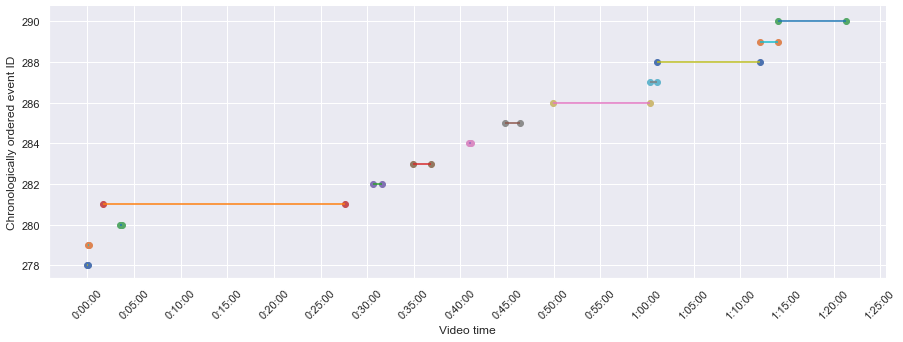

In [5]:
user_ids = df['user'].unique()
plot_session_intervals(df[df['user'] == user_ids[13]])

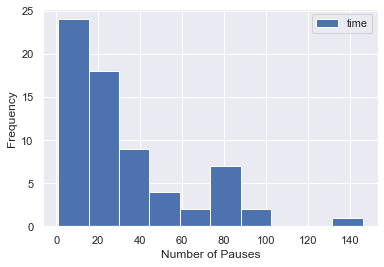

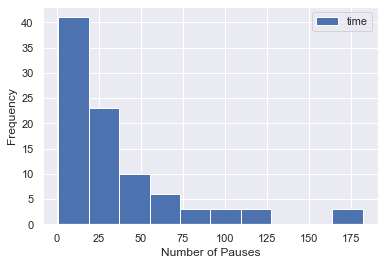

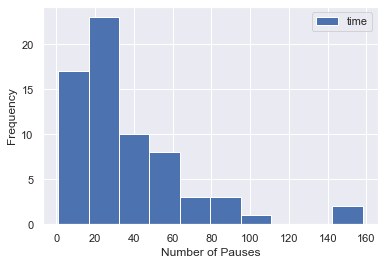

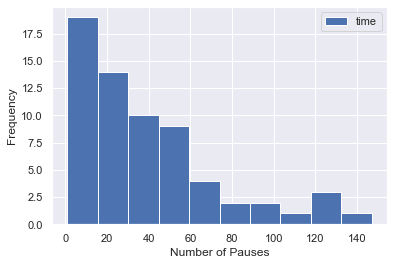

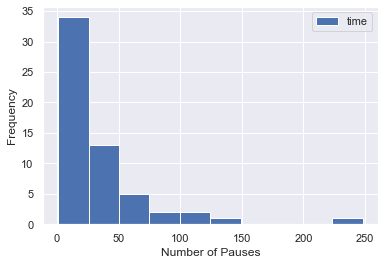

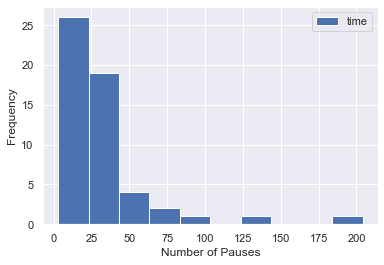

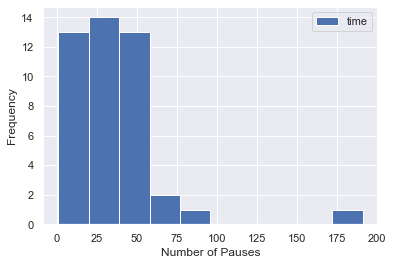

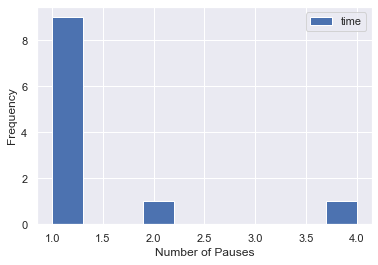

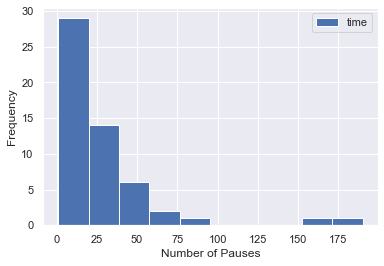

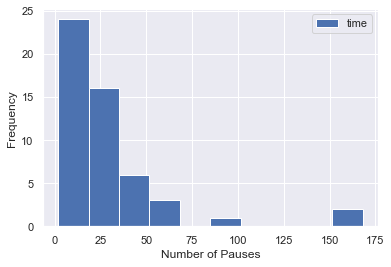

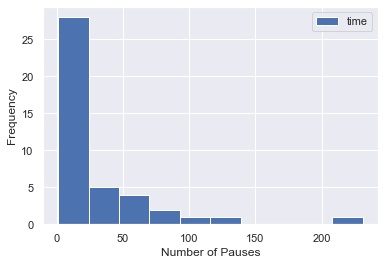

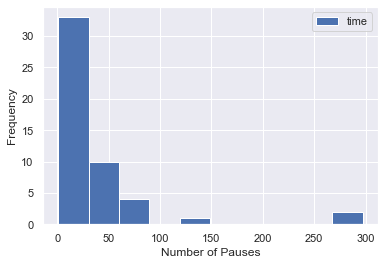

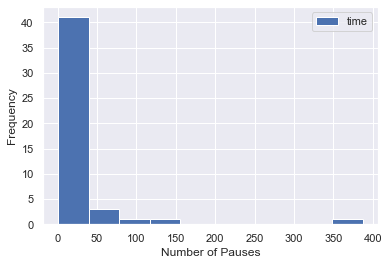

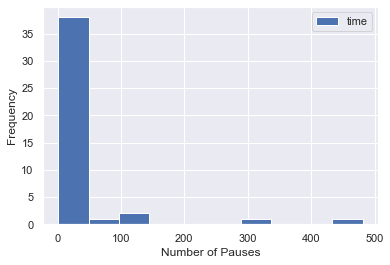

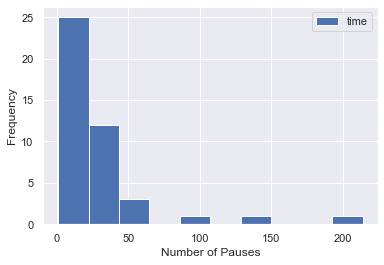

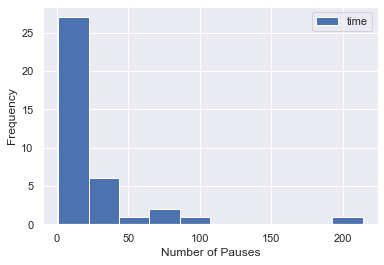

In [6]:
user_ids = df['user'].unique()
for lecture in LECTURES:
    df = lecture.viewing_data()
    df.groupby('user').count().plot.hist(y="time")
    plt.xlabel("Number of Pauses")


In [ ]:
for lecture in LECTURES:
    df = lecture.viewing_data()
    df.groupby('start').count().plot.hist(y="time")

5341
5351
5341
5340
5340
5363
5348
5003
5341


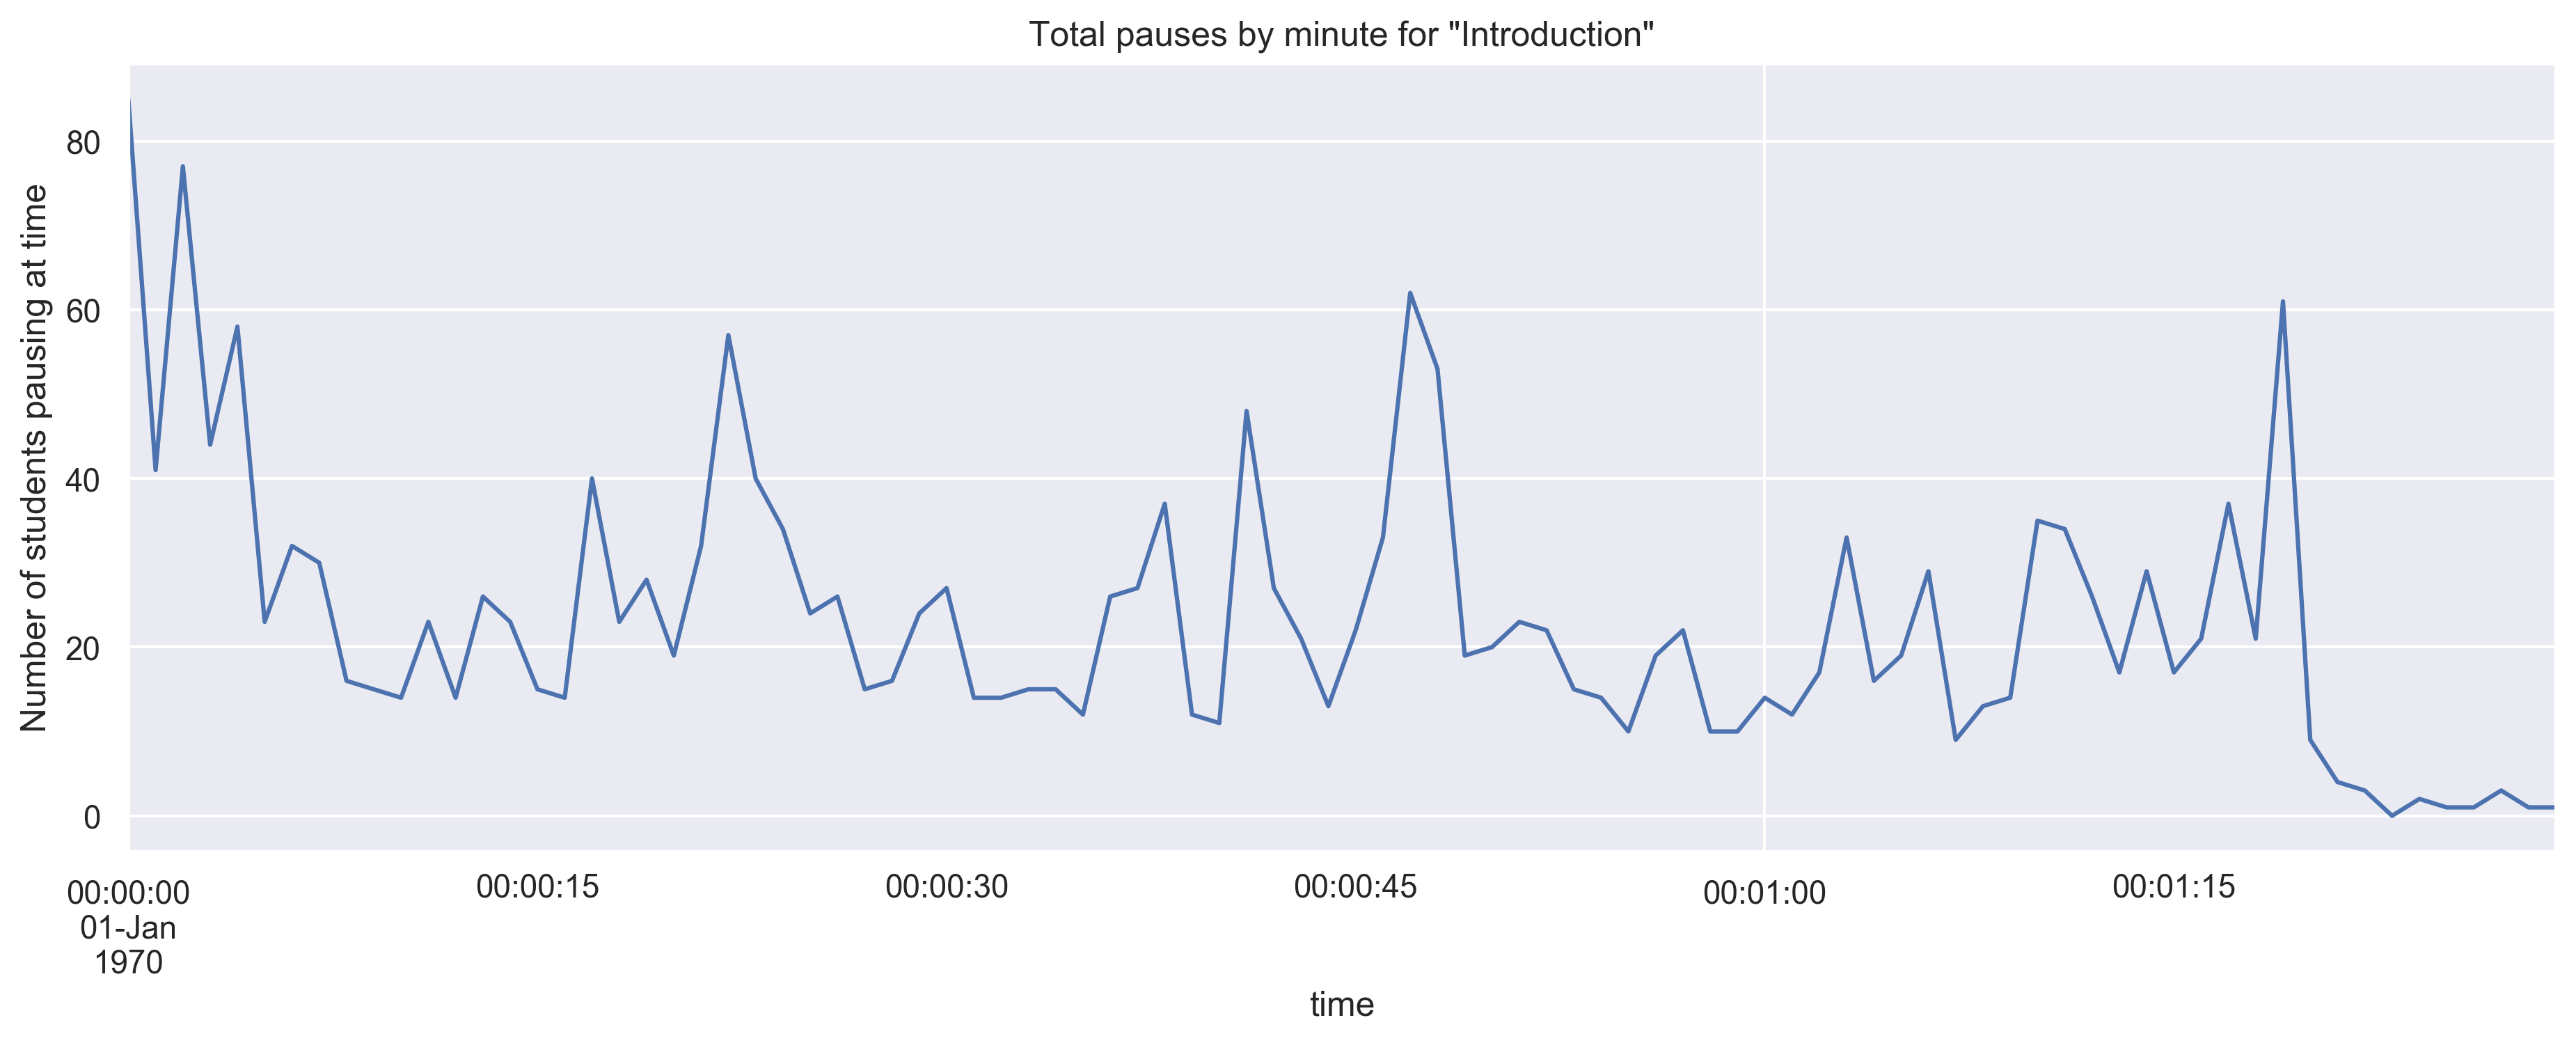

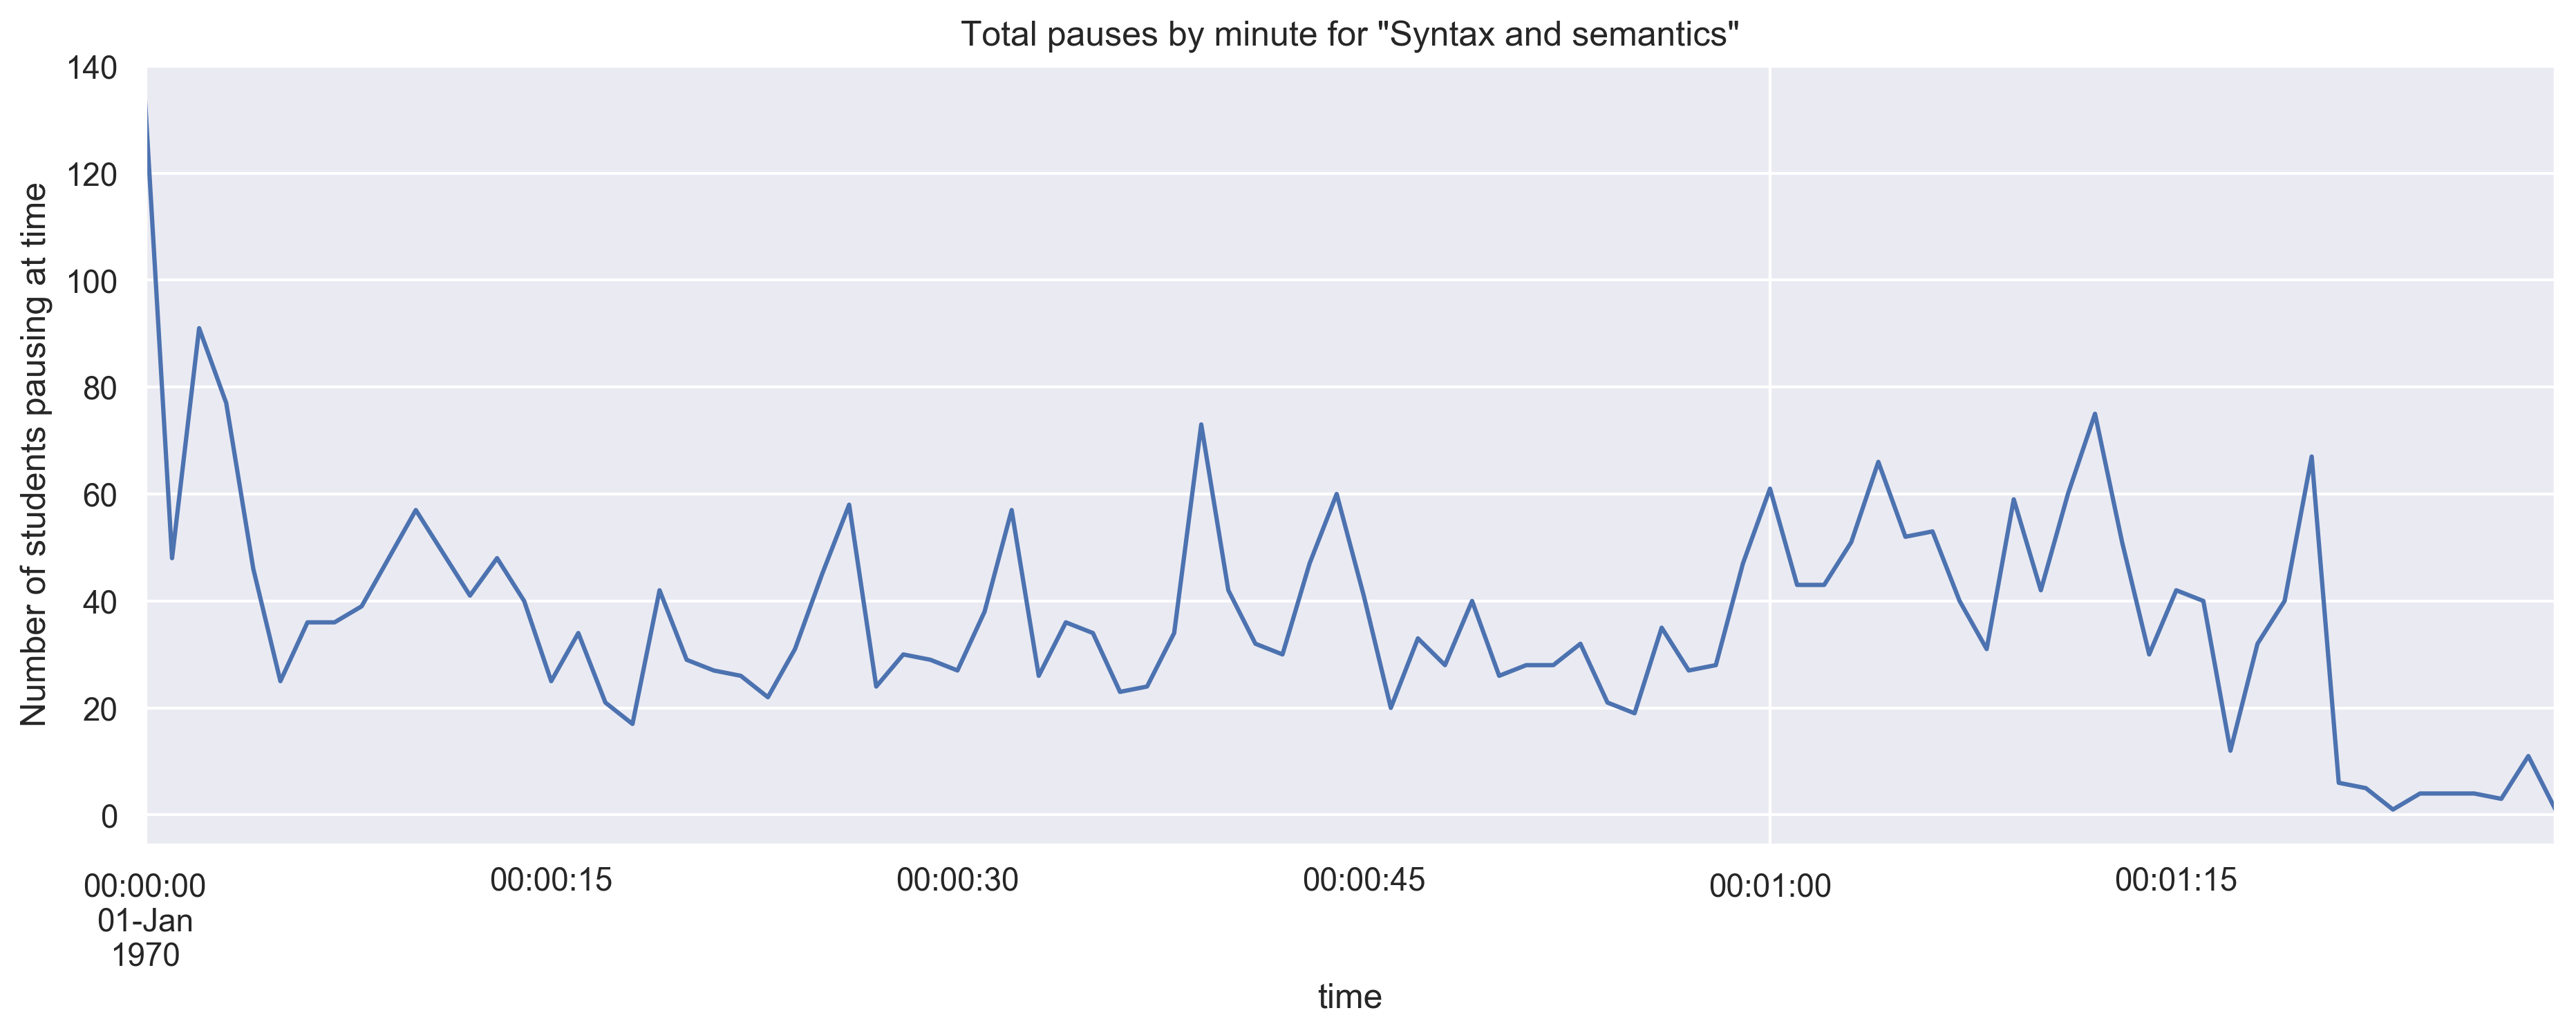

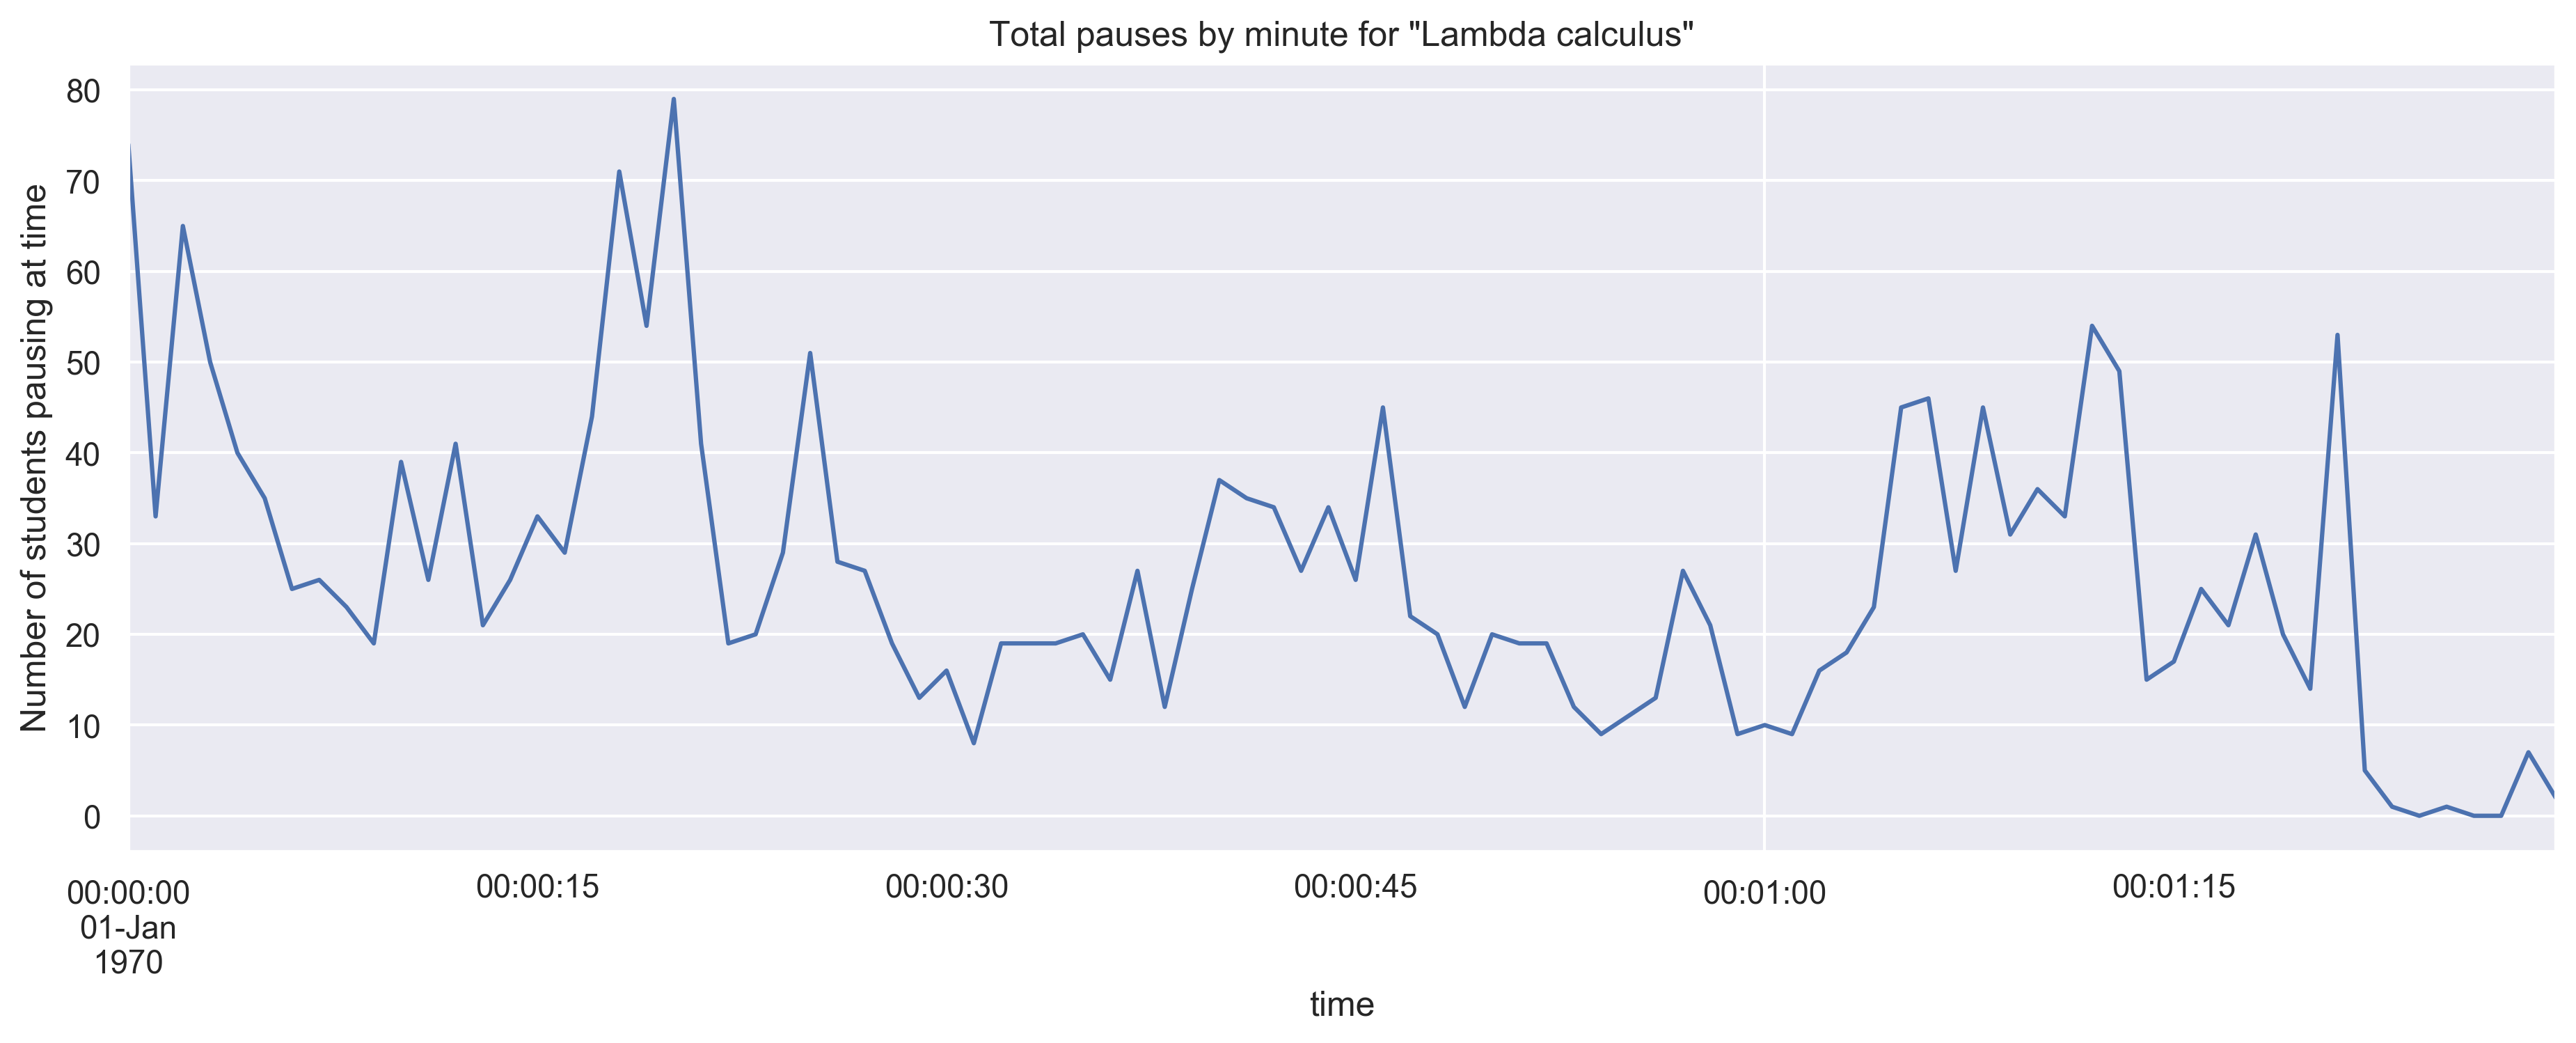

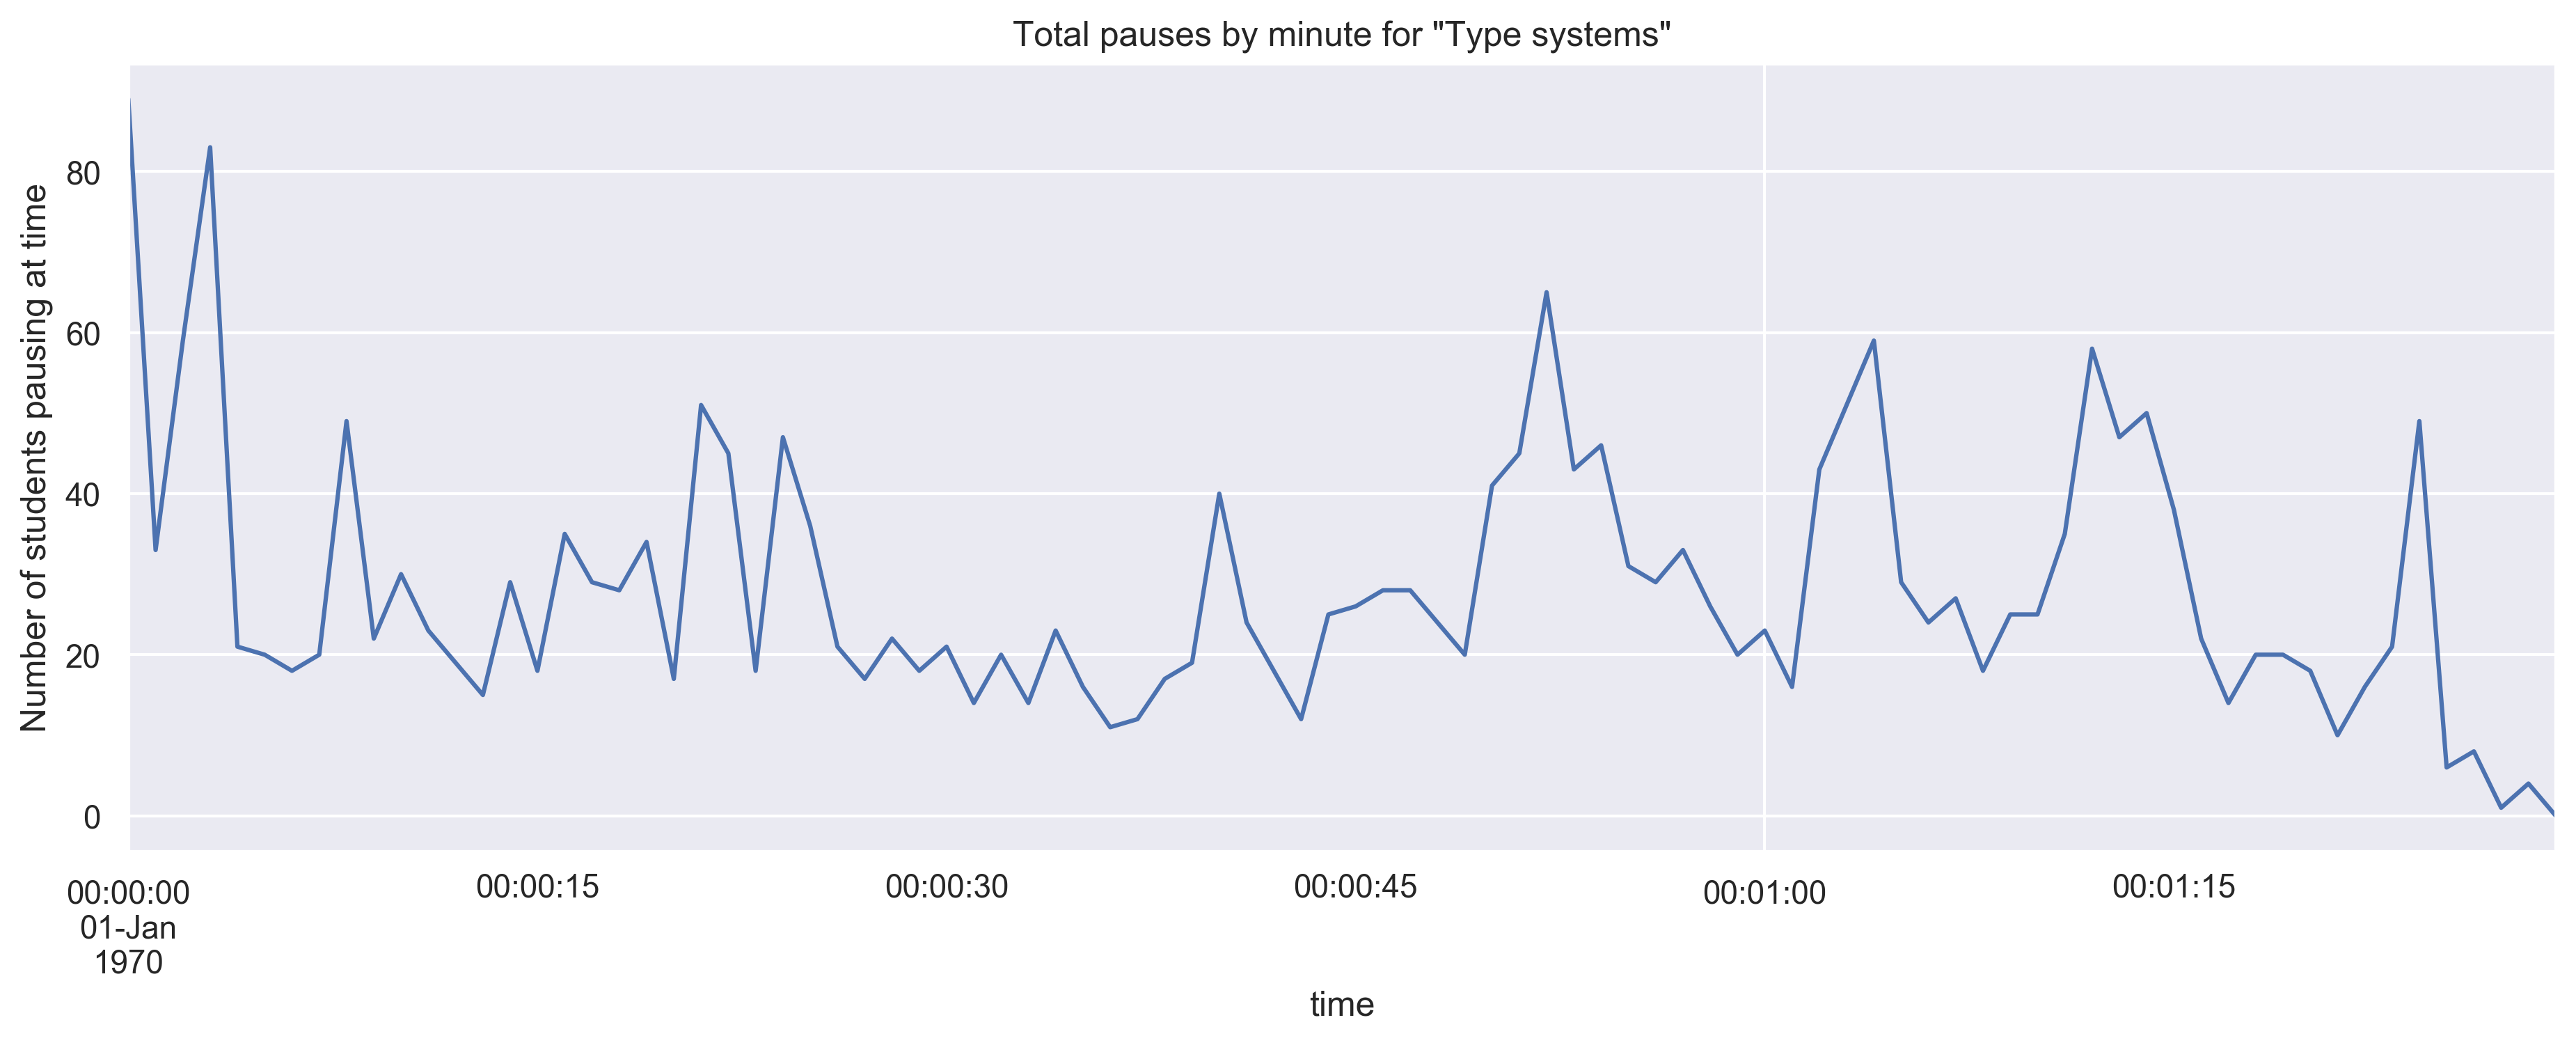

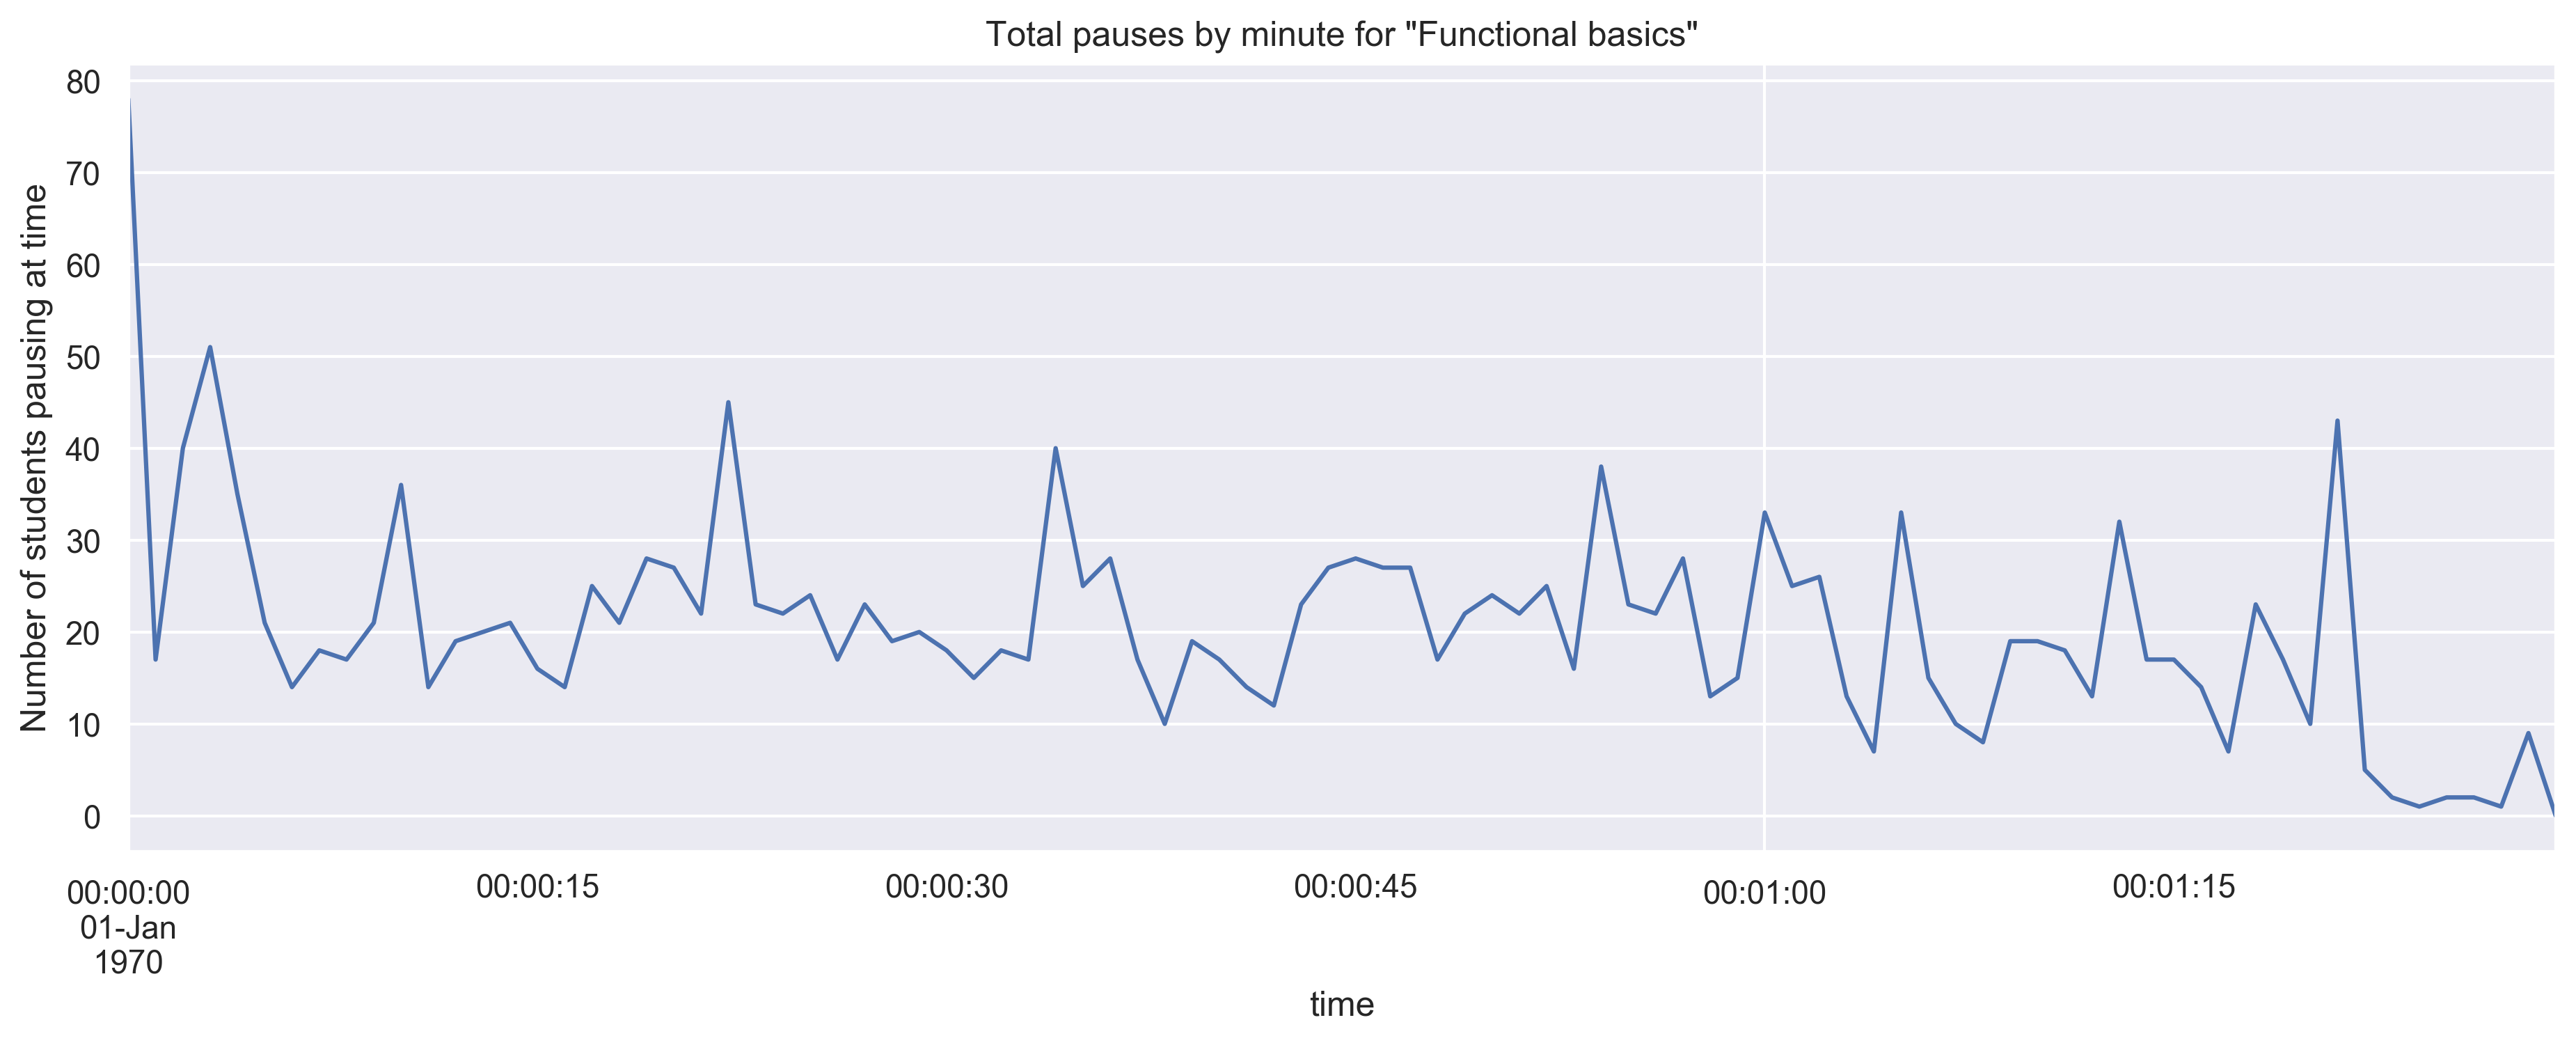

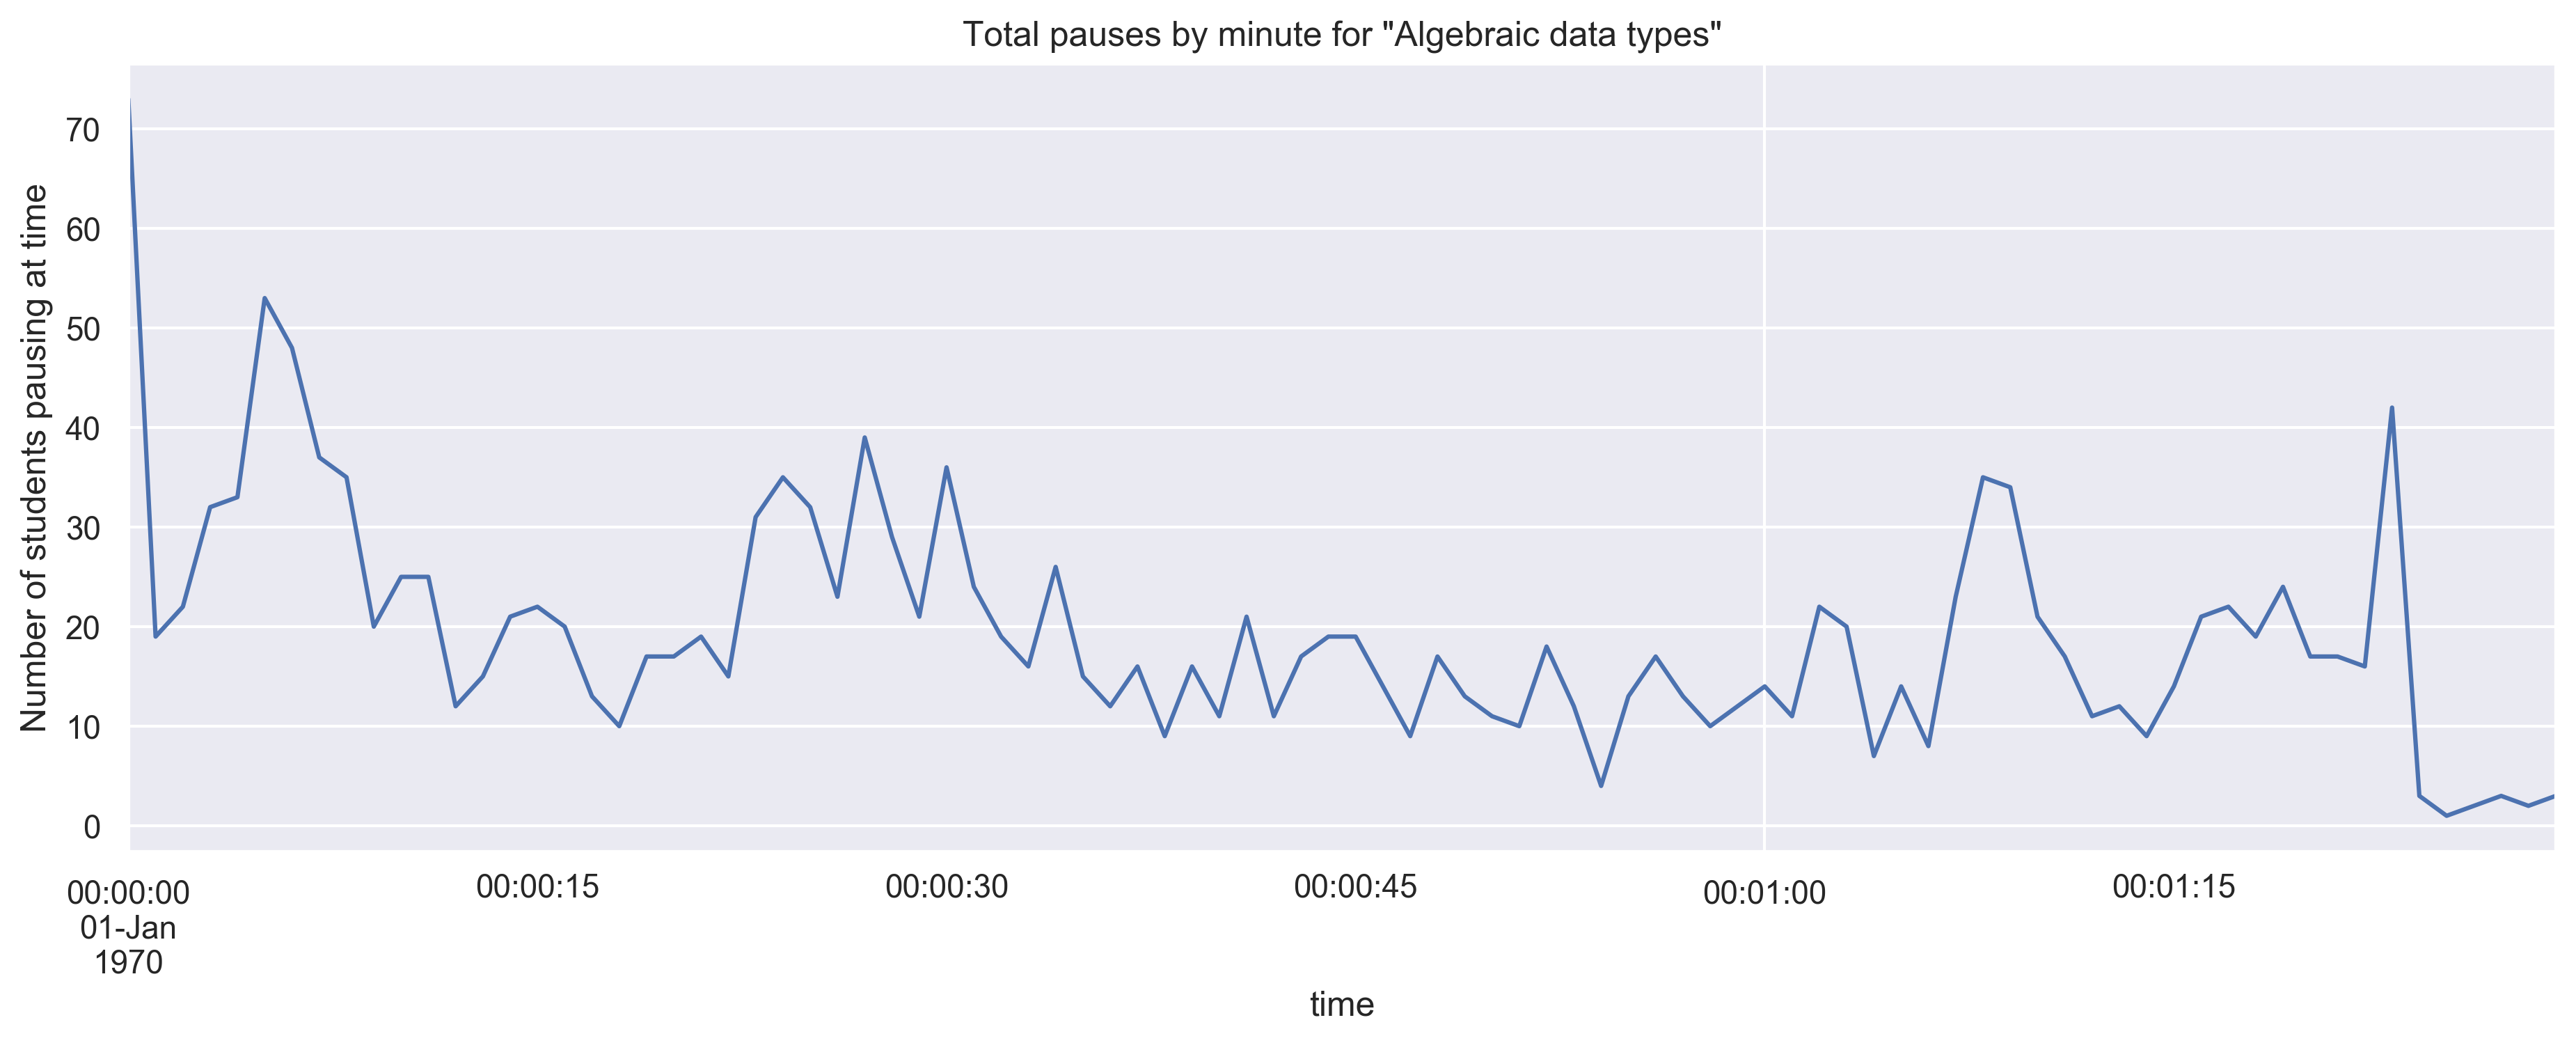

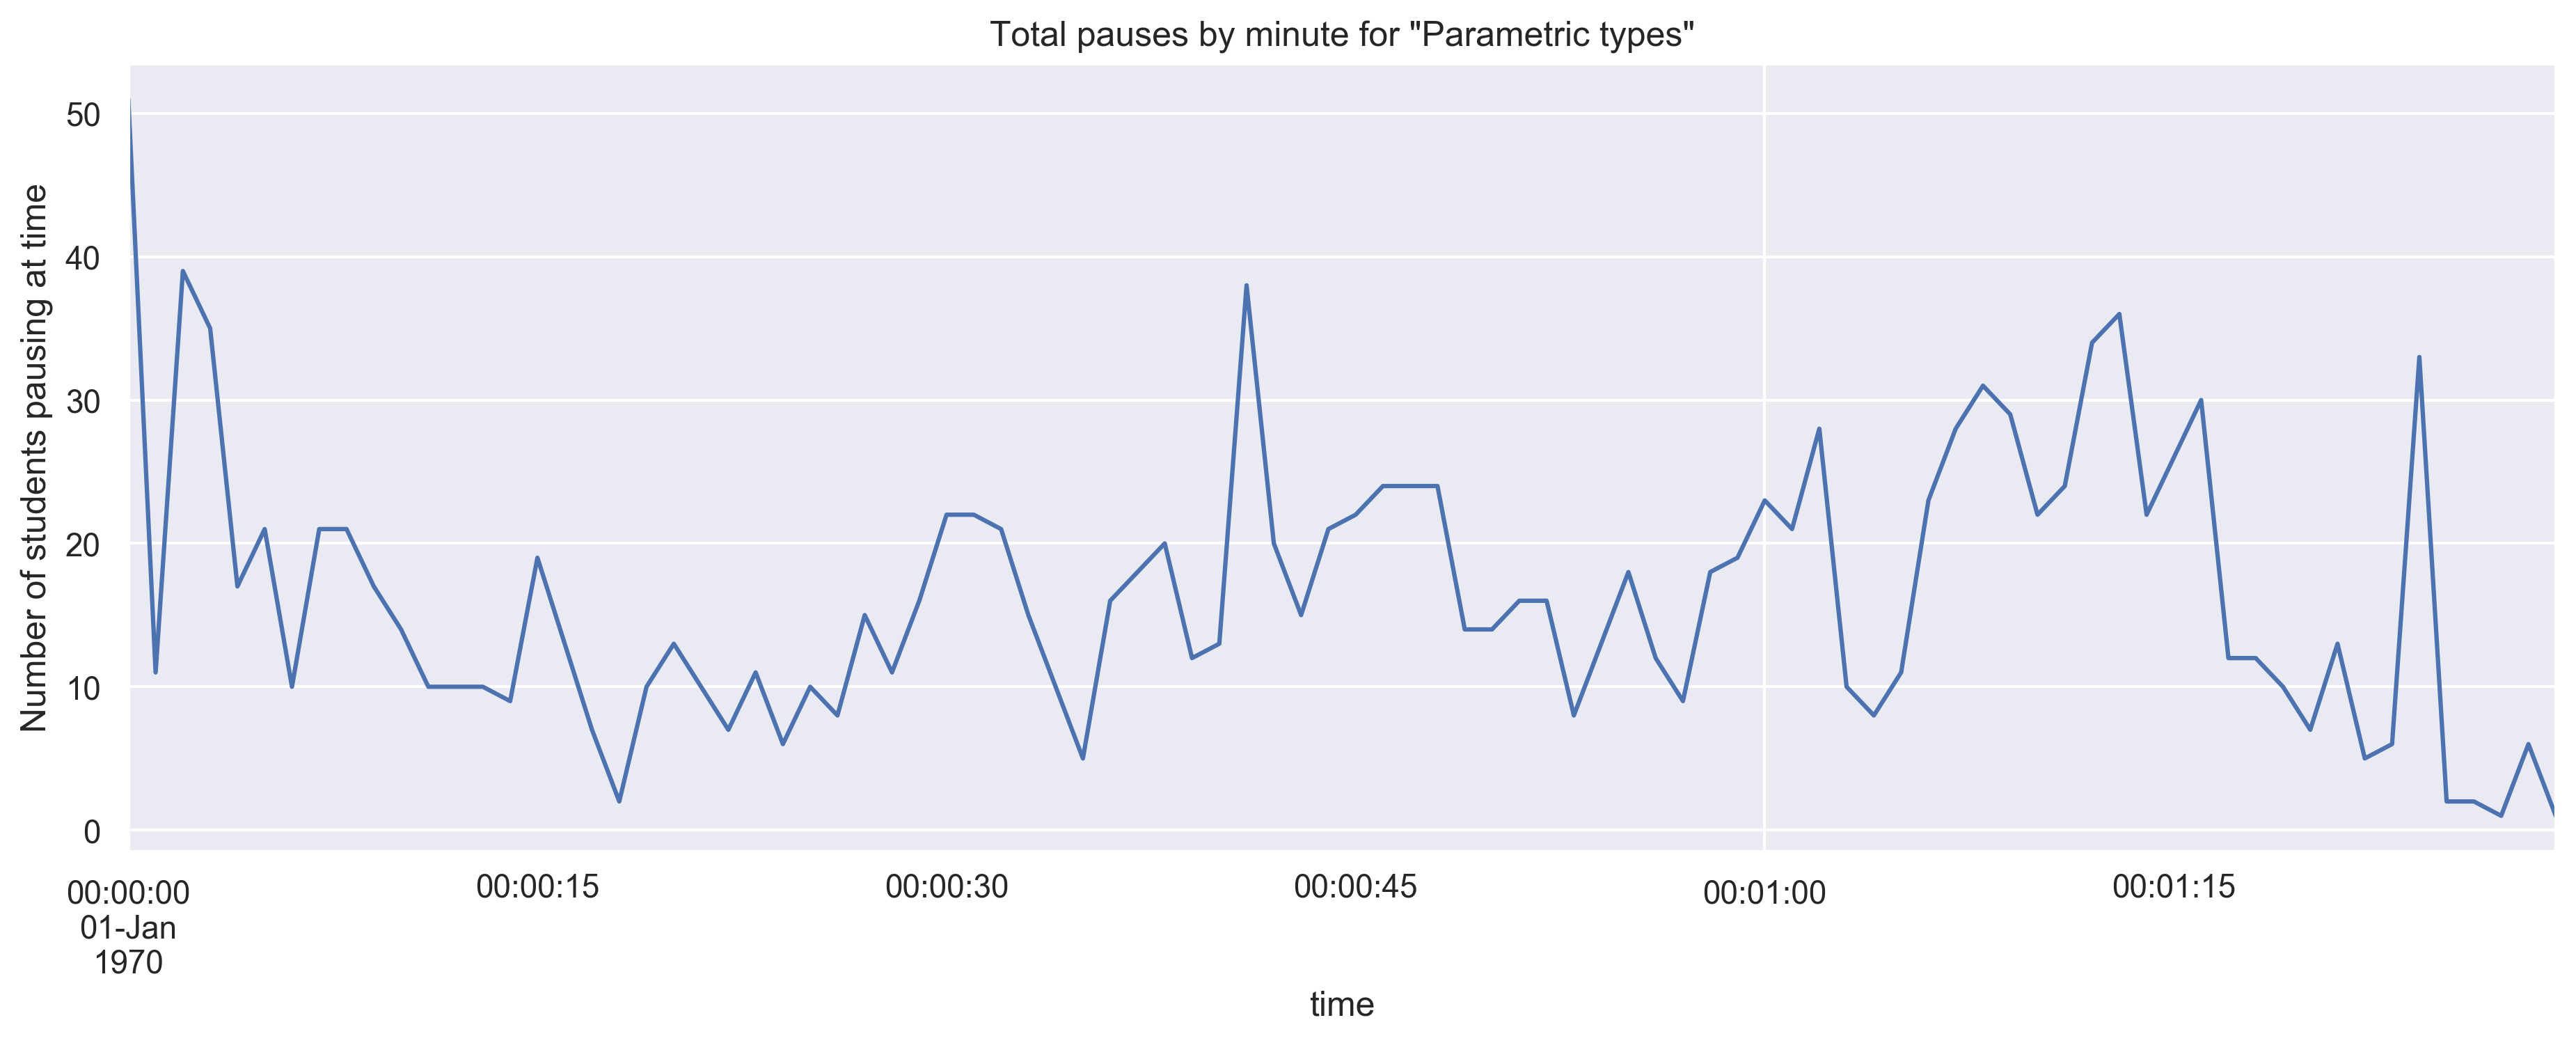

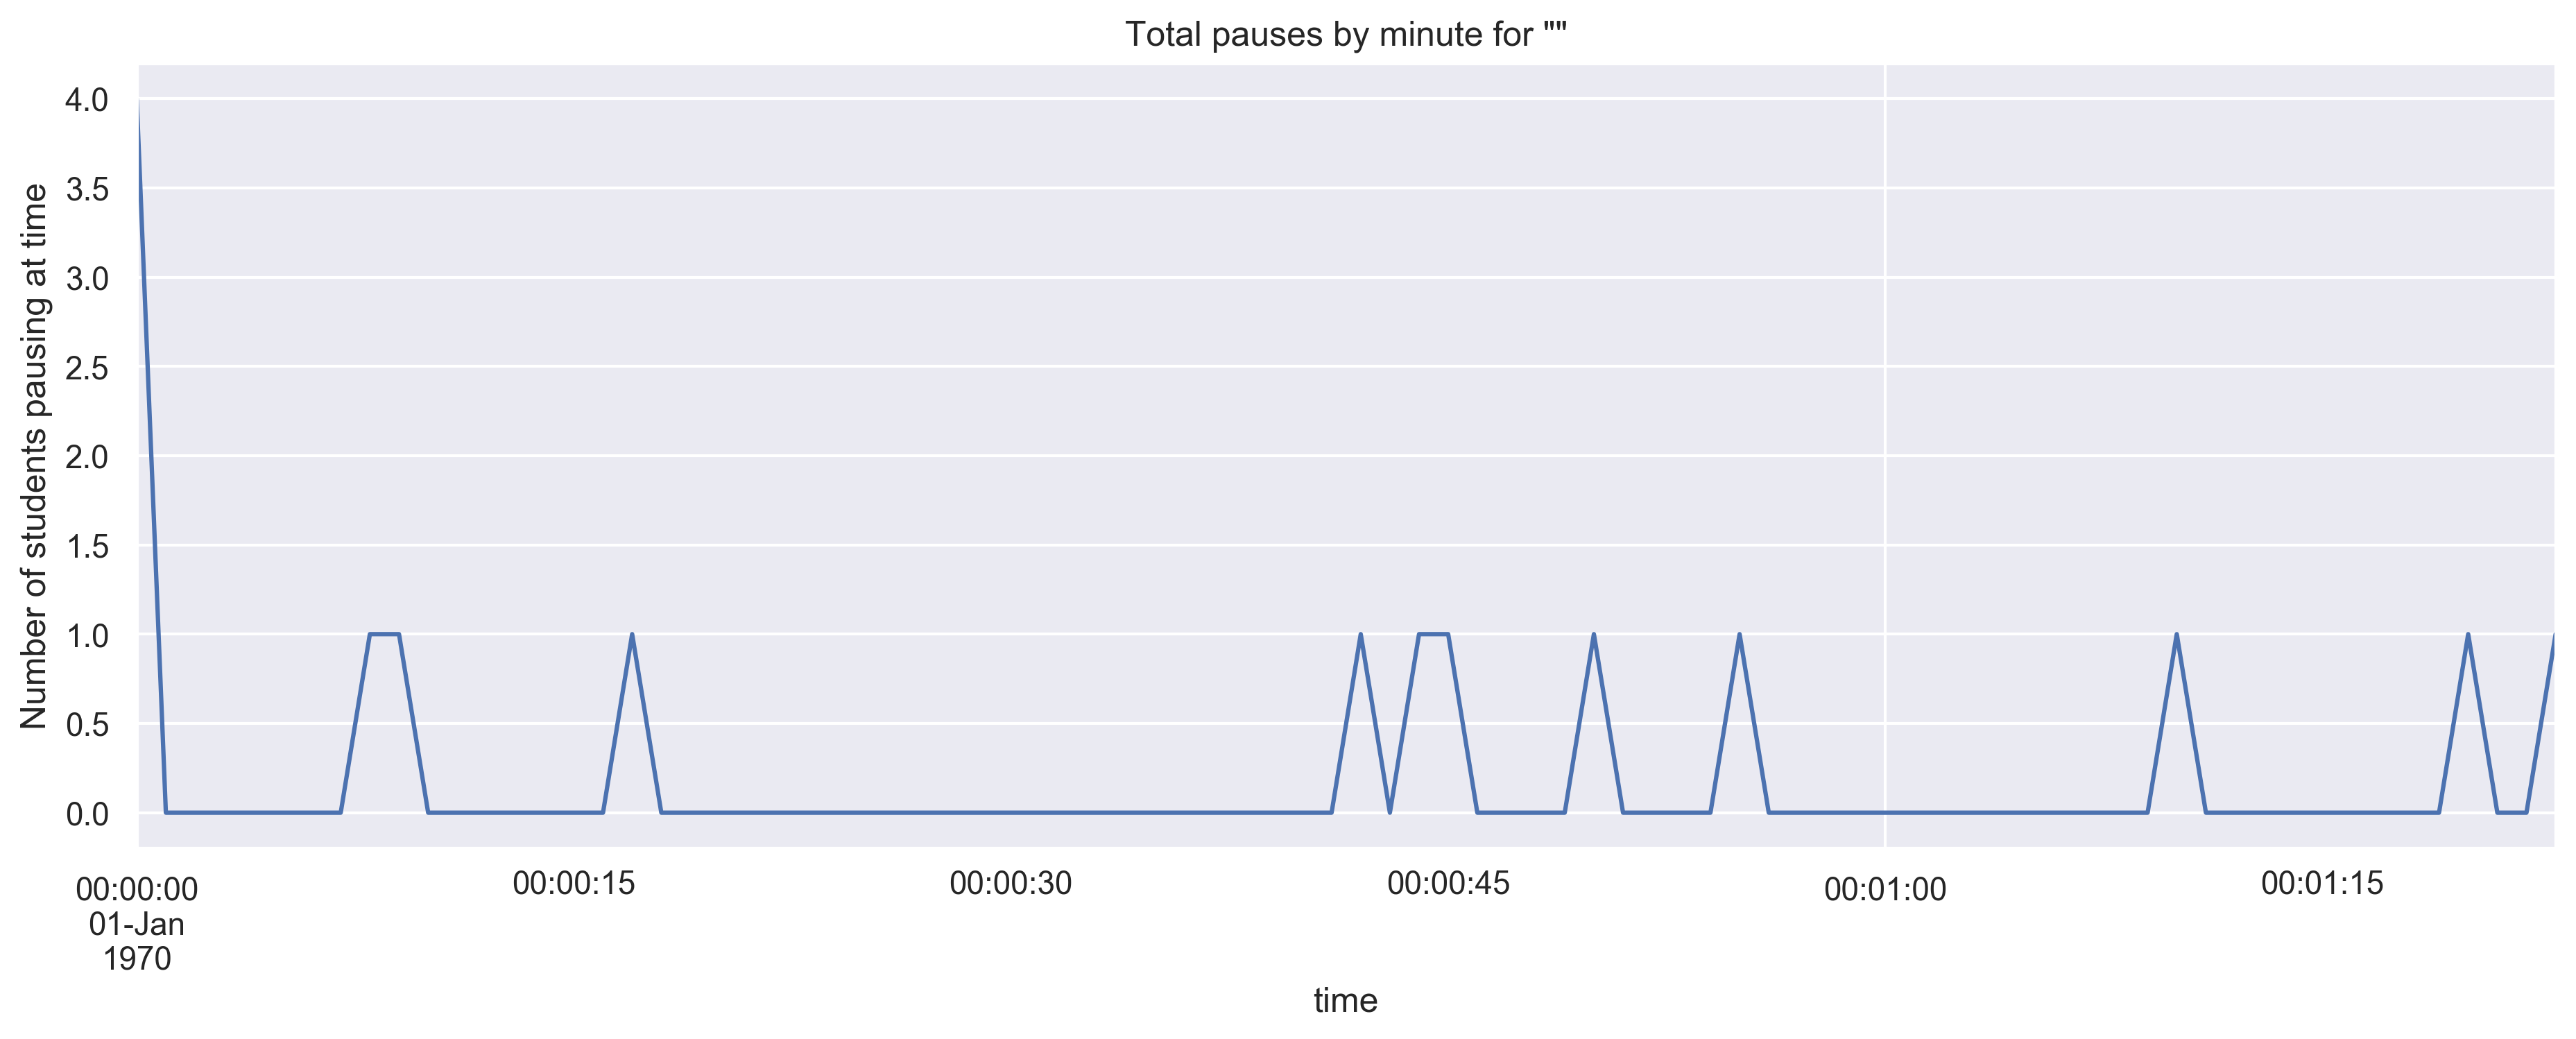

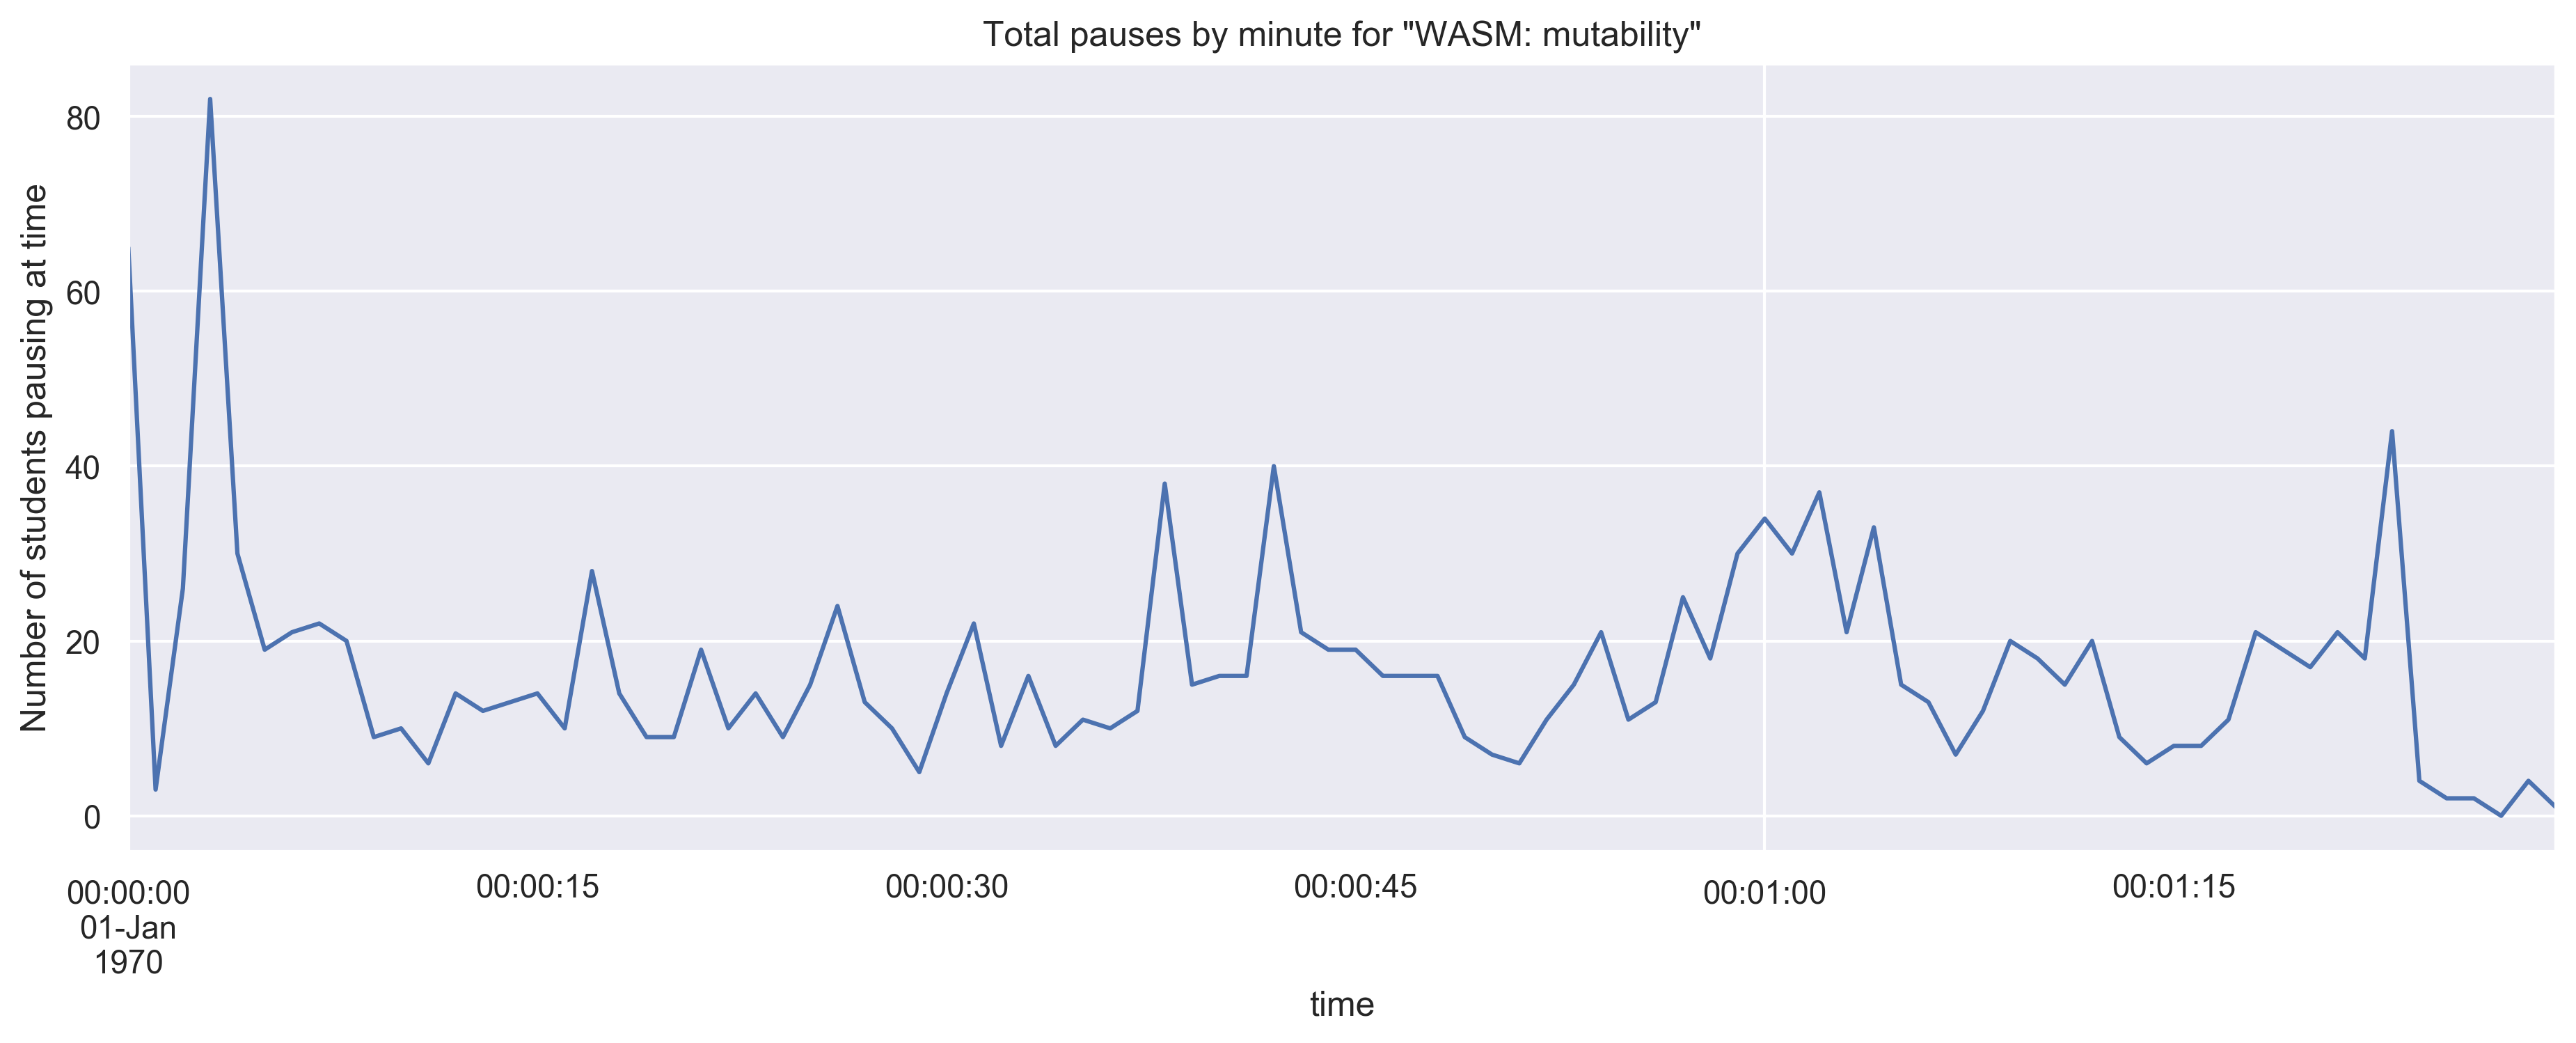

In [7]:
# Pause data
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

vd = df
vd = pd.concat([l.viewing_data() for l in LECTURES])
for lec in range(1,10):
    vd = pd.concat([l.viewing_data() for l in LECTURES])

    vd = vd[vd.lecture == lec]

    fig, ax = plt.subplots()

    max_time = int(vd.end.max())+1
    print(max_time)
    bins = [0 for _ in range(0, int(max_time/60)+1)]

    for _, row in vd.iterrows():
    #     for i in np.arange(np.floor(row.start), np.ceil(row.end)):
        bins[int(np.floor(row.end)/60)] += 1
    time = [pd.Timestamp(i * 1e9) for i in range(0, int(max_time/60)+1)]
    ax = pd.DataFrame({
        'viewers': bins,
        'time': time
    }).plot('time', 'viewers', figsize=(15, 5), legend=False, ax=ax)
    ax.set_title(
        f'Total pauses by minute for "{IDX_TO_LECTURE[lec].name}"')
    ax.set_ylabel('Number of students pausing at time')

In [31]:
# video = vd.groupby('lecture').sum
# video

In [32]:
# g = sns.FacetGrid(vd.groupby(['lecture', 'user']).sum().reset_index(), col="minutes")

In [33]:
# g = sns.FacetGrid(
#     vd.groupby(['lecture', 'user']).mean().reset_index(),
#     col="minutes", col_wrap=4)

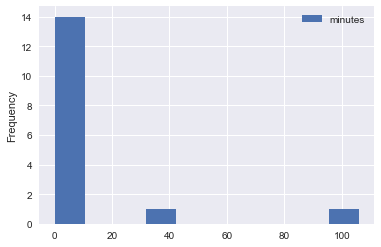

In [23]:
df.groupby("user").mean().plot.hist(y="minutes")

23


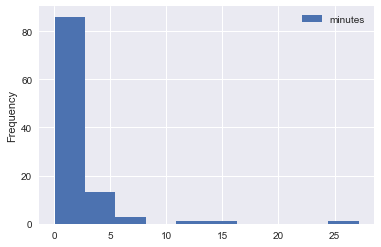

In [6]:
vd = pd.concat([l.viewing_data() for l in LECTURES])
print(len(LECTURES))
users = vd.user.unique()

vd.groupby("user").mean().plot.hist(y="minutes")

In [70]:
df[df['Timestamp'].dt.day == 26].groupby("User ID").count().shape[0]
df.groupby("User ID").sum()["Minutes Delivered"]

User ID
015bdad0-8d66-4c25-bdd5-a9d20041d58a      0.026395
053aede8-f36e-4eec-975d-a8b90120b53a     85.180563
05eb966b-d9fb-4394-af83-a9670047c0e8     12.853636
089a1d24-77e8-47ad-a5b1-aad401758b55     96.176167
0a787656-62c6-4471-8f52-a97b0065e6df     16.534874
15b814ea-91a2-4733-819d-a9ec015ecf0f     10.380596
1e13c3f3-9195-4638-9ebd-aad20065c690     86.733596
21168627-ddf7-4eca-b7b0-a9660104e28d     81.701952
25d221e2-007d-46a0-b36b-a965016712da     46.981212
35995a1c-0d3d-4f09-a29e-aad2001677b3     54.864049
39c7d95d-e5dc-4d7f-9d77-a8b700092328     79.634147
3b268a60-cef6-4303-b85f-a969016c615b     14.027544
3e072ff5-ff78-4f11-99e6-a90a00100c35     82.091252
3ea47bca-f943-4e4c-9360-a8b80000bc9c     79.209641
4a1c68d5-38ac-46a5-a143-a968003e8db8     79.611847
4a959b05-7009-4d10-9f0c-a920000e58e4      0.100170
53e0fae6-1d50-40be-bb16-a98901165365     79.195558
5cb72e04-e0fb-4480-89c4-a8630163f37f     70.330281
5d6ff8a1-5ae3-4235-aa39-a92201568450      0.274994
5dd1c7f2-2ebf-4c42-a249

In [71]:
df

,Timestamp,Start Position,Minutes Delivered,User ID,End Position
0,2019-11-03 20:24:39,211.227436,0.039679,c799d499-6e22-4882-b6fd-67590919c0fe,213.608166
1,2019-11-03 20:24:39,143.993196,0.154131,c799d499-6e22-4882-b6fd-67590919c0fe,153.241060
2,2019-11-03 20:24:39,153.225584,0.412984,c799d499-6e22-4882-b6fd-67590919c0fe,178.004603
3,2019-11-03 20:25:09,178.099415,1.262772,c799d499-6e22-4882-b6fd-67590919c0fe,253.865715
4,2019-11-03 20:32:09,253.975339,9.145023,c799d499-6e22-4882-b6fd-67590919c0fe,802.676691
...,...,...,...,...,...
1189,2019-10-28 23:54:33,4730.030470,0.530233,7ca39010-b30b-4099-adf9-aae2006c5729,4761.844477
1190,2019-10-28 23:55:03,4796.635944,1.398081,7ca39010-b30b-4099-adf9-aae2006c5729,4880.520782
1191,2019-10-28 23:55:49,4880.670727,0.030769,7ca39010-b30b-4099-adf9-aae2006c5729,4882.516895
1192,2019-10-28 23:55:49,4955.831654,0.023111,7ca39010-b30b-4099-adf9-aae2006c5729,4957.218333


In [40]:
df_id = df.groupby('User ID')

In [41]:
df_per_person = df_id.groups
df_min = df_id.aggregate(np.min)
df_min

,Timestamp,Start Position,Minutes Delivered,End Position
User ID,,,,
015bdad0-8d66-4c25-bdd5-a9d20041d58a,2019-09-25 20:10:36,0.000000,0.036050,62.419232
03bf7fb9-fdca-40e4-bcfa-a8b2015c8ab4,2019-09-25 21:20:54,0.000000,0.020224,1.213439
053aede8-f36e-4eec-975d-a8b90120b53a,2019-09-25 18:51:37,130.601094,0.055126,140.075739
05eb966b-d9fb-4394-af83-a9670047c0e8,2019-09-25 22:01:54,0.000000,0.019587,2.096269
08633ab0-4cb9-4f34-9898-a9d6018521e1,2019-09-30 23:11:37,0.000000,0.103944,6.236647
...,...,...,...,...
f7feda5e-9c69-48a7-8800-a8c4012ff4d6,2019-09-25 19:31:20,0.000000,0.018406,29.253063
fa24f4d2-de8d-43c0-ae50-a9bc000e83c7,2019-09-25 21:02:11,0.000000,0.019813,3.291299
fa515b86-925a-4ab5-83bc-a8b6012ef847,2019-09-25 17:33:30,7.685123,0.016933,10.454689


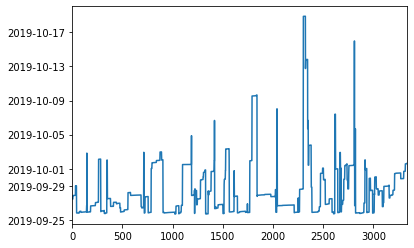

In [26]:
df['Timestamp'].plot()

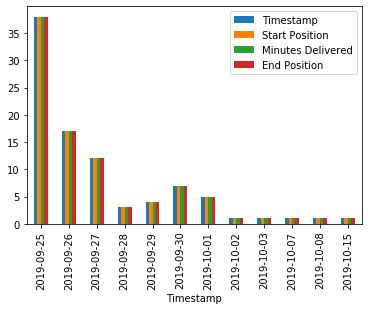

In [27]:
# df['Timestamp'] = df['Timestamp'].astype("datetime64")
df_min.groupby(df_min["Timestamp"].dt.date).count().plot(kind="bar")

In [6]:
counts = []
for date in range(1, 32):
    counts.append([date, df[df['Timestamp'].dt.day == date].groupby("User ID").count().shape[0]])

In [161]:
plt.bar(np.array(counts)[:,0], np.array(counts)[:, 1])

NameError: name 'counts' is not defined

In [162]:
assignment = ASSIGNMENTS[4]
assignment.duedate
assignment.lectures

[9, 10, 11]

In [268]:
def plot_lectures(df, prevplot=None, minimum_mins=10):
    print(prevplot)
    counts = []
    start_date = dt.datetime(2019, 9, 20)
    end_date = dt.datetime(2019, 11, 15)
    daterange = pd.date_range(start_date, end_date)
    for date in daterange:
        unique_users = df[df['time'].dt.date == date].groupby("user")
        exceeding_minimum_mins = unique_users.sum()["minutes"]>minimum_mins
        counts.append([date, exceeding_minimum_mins.shape[0]])
    plt.bar(np.array(counts)[:,0], np.array(counts)[:, 1], bottom=prevplot, alpha=0.8)
#     sns.barplot(x=np.array(counts)[:,0], y=np.array(counts)[:, 1],
#                 hue='Program', ci=None,  palette=sns.dark_palette(palettes["red"]))
    if prevplot is None:
        return np.array(counts)[:, 1] 
    return np.array(counts)[:, 1]+ prevplot

In [269]:
def plot_assignment(assignment, prevplot=None,i=0):
    lectures = assignment.lectures
    for lecture in lectures:
        lecture = IDX_TO_LECTURE[lecture]
        print(lecture)
        df = lecture.viewing_data()
        prevplot = plot_lectures(df,prevplot)
    plt.axvline(x=assignment.duedate)
    return prevplot

Lecture(index=2, name='Syntax and semantics', date=datetime.datetime(2019, 9, 25, 0, 0))
None
Lecture(index=3, name='Lambda calculus', date=datetime.datetime(2019, 9, 30, 0, 0))
[0 0 0 0 0 38 27 19 14 8 14 12 8 2 1 2 2 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Lecture(index=4, name='Type systems', date=datetime.datetime(2019, 10, 2, 0, 0))
[0 0 0 0 0 38 27 19 14 8 39 25 23 13 8 9 9 7 3 4 0 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
Lecture(index=5, name='Functional basics', date=datetime.datetime(2019, 10, 7, 0, 0))
[0 0 0 0 0 38 27 19 14 8 39 25 41 24 19 19 21 22 9 9 1 0 2 1 2 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
Lecture(index=6, name='Algebraic data types', date=datetime.datetime(2019, 10, 9, 0, 0))
[0 0 0 0 0 38 27 19 14 8 39 25 41 24 19 19 21 39 31 21 4 6 11 6 5 5 1 1 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
Lecture(index=6, name='Algebraic data types', date=dateti

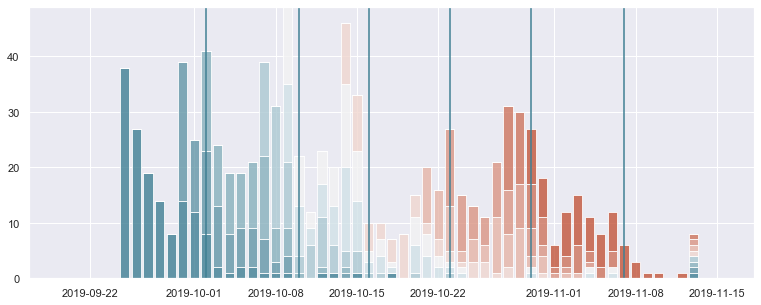

In [270]:
# sns.palplot(sns.light_palette("green"))

plt.figure(figsize=(13,5))
prevplot=None
# palettes = ["green", "blue", "purple", "navy", "palegreen", "red"]
count=0
for assignment in ASSIGNMENTS:
    sns.set_palette(sns.diverging_palette(220, 20, n=11))
    prevplot = plot_assignment(assignment,prevplot,count)
    count+=1
    

None
[0 0 0 25 20 14 3 4 3 3 5 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0]
[0 0 0 25 20 52 30 23 17 11 19 13 8 2 1 2 2 2 1 2 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 2 0 0]
[0 0 0 25 20 52 30 23 17 11 44 26 23 13 8 9 9 8 3 5 0 0 1 1 2 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 3 0 0]
[0 0 0 25 20 52 30 23 17 11 44 26 41 24 19 19 21 23 9 10 1 0 2 1 3 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 4 0 0]
[0 0 0 25 20 52 30 23 17 11 44 26 41 24 19 19 21 40 31 22 4 6 11 6 6 5 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 5 0 0]
[0 0 0 25 20 52 30 23 17 11 44 26 41 24 19 19 21 40 31 36 13 9 17 13 21 14
 3 4 2 0 6 4 2 2 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 5 0 0]
[0 0 0 25 20 52 30 23 17 11 44 26 41 24 19 19 21 40 31 36 13 9 17 13 32 24
 8 7 6 8 10 6 5 4 2 3 3 1 2 0 1 2 0 1 0 1 0 1 0 0 0 0 1 0 6 0 0]
[0 0 0 25 20 52 30 23 17 11 44 26 41 24 19 19 21 40 31 36 13 9 17 13 32 24

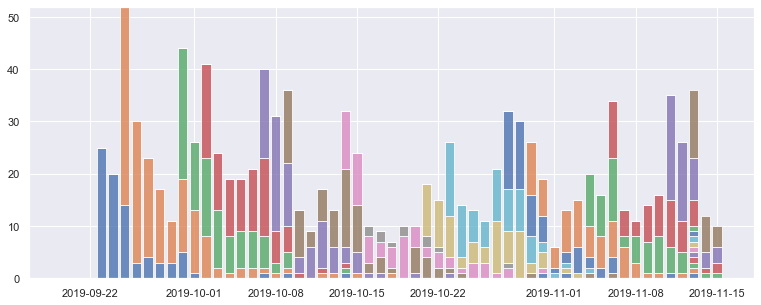

In [227]:
plt.figure(figsize=(13,5))
prevplot=None
count = 0
for lec in LECTURES:
    df = lec.viewing_data()
    prevplot = plot_lectures(df,prevplot)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 13, 15, 11, 7, 7, 7, 6, 2, 3, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=object)

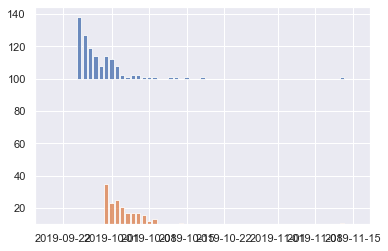

In [175]:
lecture = LECTURES[1]
df = lecture.viewing_data()
plot_lectures(df, 100)

lecture = LECTURES[2]
df = lecture.viewing_data()

plot_lectures(df, 10)

In [197]:
# vd = pd.concat([l.viewing_data() for l in LECTURES])
# vd['counts'] = vd.groupby('user')['lecture'].nunique()
# vd
# vd.plot.bar(stacked=True)

,time,start,minutes,user,end,lecture,counts
0,2019-09-23 21:48:19,0.000000,0.124773,c799d499-6e22-4882-b6fd-67590919c0fe,7.486403,1,NaN
1,2019-09-23 21:48:19,39.827988,0.099284,c799d499-6e22-4882-b6fd-67590919c0fe,45.785032,1,NaN
2,2019-09-23 21:48:19,168.563504,0.017356,c799d499-6e22-4882-b6fd-67590919c0fe,169.604871,1,NaN
3,2019-09-23 21:48:19,160.339947,1.506594,c799d499-6e22-4882-b6fd-67590919c0fe,250.735588,1,NaN
4,2019-09-23 21:49:49,4425.160217,0.029089,c799d499-6e22-4882-b6fd-67590919c0fe,4426.905585,1,NaN
...,...,...,...,...,...,...,...
919,2019-11-15 00:22:32,2691.249116,0.713629,25fba90a-8b98-4410-b050-aafe000ddfcd,2734.066873,16,NaN
920,2019-11-15 00:41:32,2734.624523,2.656539,25fba90a-8b98-4410-b050-aafe000ddfcd,2894.016839,16,NaN
921,2019-11-15 00:52:02,2894.131361,0.221248,25fba90a-8b98-4410-b050-aafe000ddfcd,2907.406247,16,NaN
922,2019-11-15 00:52:02,2907.510747,29.022435,25fba90a-8b98-4410-b050-aafe000ddfcd,4648.856872,16,NaN
